In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data=np.loadtxt('data_w3_ex1.csv', delimiter=',')

x= data[:,0]
y= data[:,1]

x=np.expand_dims(x, axis=1)
y=np.expand_dims(y, axis=1)

x.shape, y.shape

((50, 1), (50, 1))

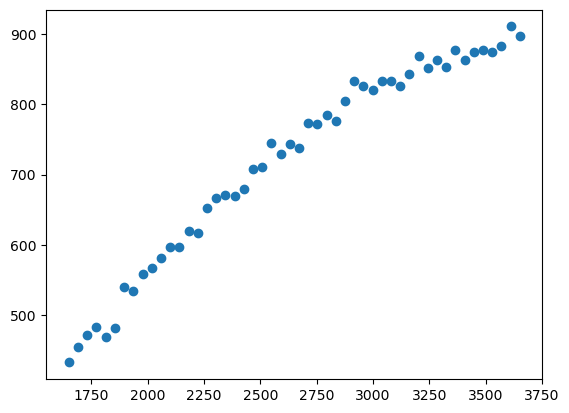

In [5]:
plt.scatter(x,y)

In [6]:
x_train, x_,y_train, y_= train_test_split(x,y,test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_,y_, test_size=0.50, random_state=1)

In [7]:
x_train.shape, x_cv.shape, x_test.shape

((30, 1), (10, 1), (10, 1))

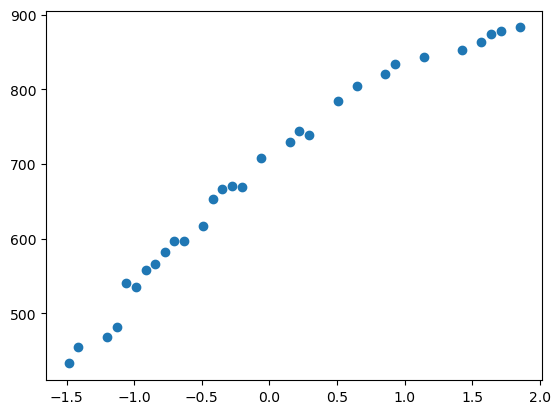

In [8]:
scaled_linear=StandardScaler()

x_train_scaled=scaled_linear.fit_transform(x_train)
plt.scatter(x_train_scaled,y_train)

In [9]:
linear_model=LinearRegression()
linear_model.fit(x_train_scaled,y_train)

LinearRegression()

In [10]:
y_hat=linear_model.predict(x_train_scaled)

In [11]:
# Manually Calculating the MSE

total_squared_error=0
for i in range(len(y_hat)):
    squared_error= (y_hat[i] - y_train[i])**2
    total_squared_error+= squared_error

mse= total_squared_error/(2*len(y_hat))
mse.squeeze()

array(406.19374193)

In [12]:
# Using scikit-learn
print(mean_squared_error(y_hat,y_train)/2)

406.19374192533155


In [13]:
x_cv_scaled=scaled_linear.transform(x_cv)
#print(x_cv_scaled)
y_cv_hat=linear_model.predict(x_cv_scaled)
mse= mean_squared_error(y_cv_hat, y_cv)
mse/2

551.7789026952216

In [14]:
poly=PolynomialFeatures(degree=2, include_bias=False)
x_trained_poly=poly.fit_transform(x_train)

In [15]:
x_trained_p_scaled=scaled_linear.fit_transform(x_trained_poly)
x_trained_p_scaled

array([[ 1.42715997,  1.47236856],
       [-0.27691164, -0.36461881],
       [ 1.71117191,  1.84025141],
       [ 0.22010925,  0.1055935 ],
       [ 0.14910627,  0.03511397],
       [-1.19995042, -1.09459566],
       [ 0.8591361 ,  0.78950426],
       [-0.48992059, -0.54960669],
       [ 0.64612715,  0.55161499],
       [-0.77393252, -0.78082762],
       [ 0.50412118,  0.39853271],
       [ 1.64016892,  1.74662753],
       [ 0.93013909,  0.8710049 ],
       [-0.20590865, -0.30075196],
       [-0.06390269, -0.16971192],
       [ 0.29111223,  0.17717513],
       [-1.05794446, -0.99441476],
       [-0.98694147, -0.94267114],
       [ 1.85317788,  2.0308055 ],
       [-1.41295938, -1.23660116],
       [-0.34791462, -0.42738355],
       [-1.48396236, -1.2817321 ],
       [-0.4189176 , -0.48904617],
       [-1.12894744, -1.04505626],
       [-0.70292954, -0.72467556],
       [-0.84493551, -0.83587757],
       [-0.91593849, -0.88982541],
       [-0.63192656, -0.66742138],
       [ 1.56916594,

In [16]:
model=LinearRegression()
model.fit(x_trained_p_scaled,y_train)

LinearRegression()

In [17]:
yhat_p= model.predict(x_trained_p_scaled)
print(mean_squared_error(yhat_p,y_train)/2)

49.111609334025154


In [18]:
x_cv_poly=poly.transform(x_cv)
x_cv_p_scaled=scaled_linear.transform(x_cv_poly)
yhat_cv_p=model.predict(x_cv_p_scaled)
print(mean_squared_error(yhat_cv_p,y_cv)/2)

87.6984121111191


# Checking different degree of polynomials

In [19]:
train_mses=[]
cv_mses=[]
models=[]
scalers=[]
degrees=[]

for i in range(1,11):
    
    poly=PolynomialFeatures(degree=i, include_bias=False)
    x_train_poly=poly.fit_transform(x_train)
    
    scaled=StandardScaler()
    x_train_scale=scaled.fit_transform(x_train_poly)
    scalers.append(scaled)
    
    model=LinearRegression()
    model.fit(x_train_scale,y_train)
    models.append(model)
    
    yhat_train=model.predict(x_train_scale)
    train_error= mean_squared_error(yhat_train,y_train)/2
    train_mses.append(train_error)
    
    poly=PolynomialFeatures(degree=i, include_bias=False)
    x_cv_poly=poly.fit_transform(x_cv)
    x_cv_scale=scaled.transform(x_cv_poly)
    yhat_cv=model.predict(x_cv_scale)
    cv_error=mean_squared_error(yhat_cv,y_cv)/2
    cv_mses.append(cv_error)
    
    degrees.append(i)


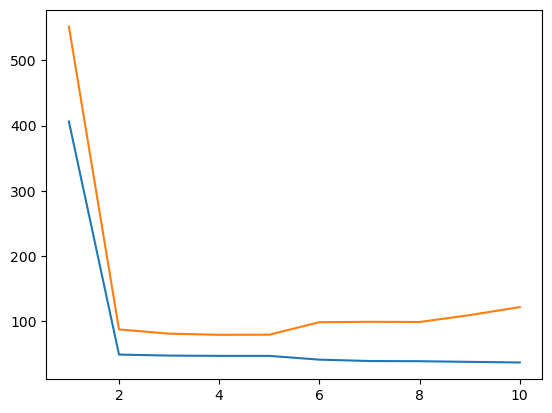

In [20]:
plt.plot(degrees,train_mses)
plt.plot(degrees,cv_mses)

In [21]:
max_deg=np.argmin(cv_mses)+1
print(max_deg)

scalers[max_deg-1]

4


StandardScaler()

In [22]:
poly=PolynomialFeatures(degree=max_deg, include_bias=False)
x_test_poly=poly.fit_transform(x_test)
x_test_scale=scalers[max_deg-1].transform(x_test_poly)
yhat_test=models[max_deg-1].predict(x_test_scale)
test_error=mean_squared_error(yhat_test,y_test)/2

In [23]:
print('Training Error: ',train_mses[max_deg-1])
print('CV Error: ',cv_mses[max_deg-1])
print('Test Error: ',test_error)

Training Error:  47.146466442636225
CV Error:  79.43134912070437
Test Error:  104.63168205290594


In [26]:
tf.random.set_seed(20)

model_1= Sequential(

    [
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(12, activation='relu'),
        Dense(1, activation='linear'),
    ]
)

In [28]:
model_1.compile(

    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
)

model_1.fit(x_trained_p_scaled,y_train,epochs=300,verbose=0)

In [30]:
yhat_tf= model_1.predict(x_trained_p_scaled)
train_mse=mean_squared_error(yhat_tf,y_train)/2

yhat_cv_tf= model_1.predict(x_cv_p_scaled)
cv_mse=mean_squared_error(yhat_cv,y_cv)/2

train_mse,cv_mse

1/1 [==============================] - 0s 11ms/step


(43.12478203587376, 121.85070594643454)